## HousePrice Prediction using ANN & Functional API

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

#### Importing Dataset from Sci-kit Learn

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=50)

#### Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [10]:
np.random.seed(50)
tf.random.set_seed(50)

In [11]:
X_train.shape

(11610, 8)

In [12]:
X_test.shape

(5160, 8)

In [13]:
X_valid.shape

(3870, 8)

#### Creating Structure of Regression Functiol API ANN Model

In [14]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
# calling input_ layer as function
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

#### Compiling the model

In [16]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [17]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 5s 7ms/step - loss: 2.2311 - mae: 1.1426 - val_loss: 0.7684 - val_mae: 0.6334
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7327 - mae: 0.6104 - val_loss: 0.6905 - val_mae: 0.6109
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6623 - mae: 0.5871 - val_loss: 0.6486 - val_mae: 0.5889
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6000 - mae: 0.5563 - val_loss: 0.6244 - val_mae: 0.5784
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5833 - mae: 0.5473 - val_loss: 0.5951 - val_mae: 0.5649
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5849 - mae: 0.5402 - val_loss: 0.5740 - val_mae: 0.5544
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5293 - mae: 0.5250 - val_loss: 0.5574 - val_mae: 0.5444
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [18]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4244 - mae: 0.4571


In [19]:
model_history.history

{'loss': [1.5085711479187012,
  0.7022940516471863,
  0.6414400935173035,
  0.601527214050293,
  0.5715582966804504,
  0.5428943037986755,
  0.5212160348892212,
  0.5013296008110046,
  0.485250324010849,
  0.47037944197654724,
  0.4597136378288269,
  0.44959259033203125,
  0.4415992498397827,
  0.43537911772727966,
  0.4285051226615906,
  0.42363566160202026,
  0.41830313205718994,
  0.4144939184188843,
  0.4107559025287628,
  0.40723392367362976,
  0.4041399657726288,
  0.40104398131370544,
  0.39809709787368774,
  0.3954378664493561,
  0.3928975462913513,
  0.39072054624557495,
  0.3883255422115326,
  0.38601043820381165,
  0.38399872183799744,
  0.3821573853492737,
  0.3801232576370239,
  0.3782511353492737,
  0.37695077061653137,
  0.3753979802131653,
  0.37370431423187256,
  0.3722882866859436,
  0.3711693286895752,
  0.36972808837890625,
  0.3684650957584381,
  0.36732324957847595],
 'mae': [0.8646358847618103,
  0.5983306169509888,
  0.5761095285415649,
  0.5565008521080017,
  0

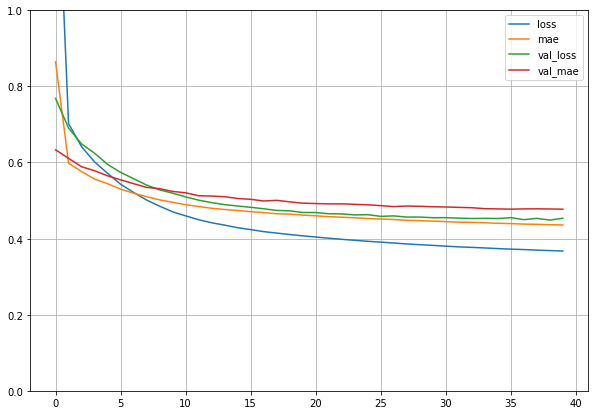

In [20]:
pd.DataFrame(model_history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Saving and Restoring Model

In [21]:
model.save('my_model.h5')

In [22]:
del model

In [23]:
keras.backend.clear_session()

In [24]:
model = keras.models.load_model('my_model.h5')

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [26]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.82586  ]
 [2.827533 ]
 [1.8785833]
 ...
 [1.704453 ]
 [1.3916957]
 [2.2459216]]


### Using Callbacks during Model Training

- callbacks are checkpoints, they allow us to save model after each and every epoch.

In [27]:
del model

In [28]:
keras.backend.clear_session()

In [29]:
np.random.seed(55)
tf.random.set_seed(50)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [31]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [32]:
checkpoints = keras.callbacks.ModelCheckpoint('model_{epoch:02d}.h5')

In [33]:
hostory = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoints])

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.7652 - val_loss: 0.9306
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8263 - val_loss: 0.7019
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6519 - val_loss: 0.6367
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5732 - val_loss: 0.5984
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5458 - val_loss: 0.5694
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5320 - val_loss: 0.5474
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4909 - val_loss: 0.5293
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4555 - val_loss: 0.5160
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4479 - val_loss: 0.5041
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4458 - val_loss: 0.4944

In [34]:
del model

In [35]:
keras.backend.clear_session()

In [36]:
model = keras.models.load_model('model_13.h5')

In [38]:
mse_test = model.evaluate(X_test, y_test, batch_size=5160)

1/1 [==============================] - 0s 218ms/step - loss: 0.4527


In [39]:
print(mse_test)

0.4527480900287628


In [40]:
model.metrics_names

['loss']

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_diff = y_pred - y_test

In [43]:
y_pred.shape

(5160, 1)

### Best Model

In [45]:
del model
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [49]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.1712 - val_loss: 1.1138
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9722 - val_loss: 0.7490
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7425 - val_loss: 0.6852
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6657 - val_loss: 0.6502
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6375 - val_loss: 0.6219
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6378 - val_loss: 0.5973
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5818 - val_loss: 0.5776
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5616
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5298 - val_loss: 0.5444
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5191 - val_loss: 0.5339

In [50]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5259
